# ***Movie Rating Prediction***

# **Importing important libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#**Input movies dataset**

---



In [4]:
movies = pd.read_csv(r"/content/movies.dat", sep='::', engine='python', encoding='latin1')
movies.columns =['MovieID', 'Title', 'Genres']
movies.dropna(inplace=True)

In [5]:
movies.head()

,MovieID,Title,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


#**Input ratings dataset**

In [8]:
ratings = pd.read_csv(r"/content/ratings.dat",sep='::', engine='python')
ratings.columns =['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings.dropna(inplace=True)

#**Read the sample ratings dataset**

In [9]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [7]:
#Input users dataset
users = pd.read_csv(r"/content/users.dat",sep='::',engine='python')
users.columns =['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users.dropna(inplace=True)

#Read the sample users dataset
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


#**Merge the ratings and users with movieID and UserID:**

In [10]:
ratings_user = pd.merge(ratings,users, on=['UserID'])
ratings_movie = pd.merge(ratings,movies, on=['MovieID'])

master_data = pd.merge(ratings_user,ratings_movie,on=['UserID', 'MovieID', 'Rating', 'Timestamp'])[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating', 'Zip-code', 'Timestamp']]

master_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Zip-code,Timestamp
0,1357,Shine (1996),2,56,M,16,5,70072,978298709
1,3068,"Verdict, The (1982)",2,56,M,16,4,70072,978299000
2,1537,Shall We Dance? (Shall We Dansu?) (1996),2,56,M,16,4,70072,978299620
3,647,Courage Under Fire (1996),2,56,M,16,3,70072,978299351
4,2194,"Untouchables, The (1987)",2,56,M,16,4,70072,978299297


In [11]:
# Number of movies with Rating of 5 = 225473
master_data[master_data['Rating'] == 5]

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Zip-code,Timestamp
0,1357,Shine (1996),2,56,M,16,5,70072,978298709
6,2268,"Few Good Men, A (1992)",2,56,M,16,5,70072,978299297
10,3468,"Hustler, The (1961)",2,56,M,16,5,70072,978298542
15,3578,Gladiator (2000),2,56,M,16,5,70072,978298958
26,1610,"Hunt for Red October, The (1990)",2,56,M,16,5,70072,978299809
...,...,...,...,...,...,...,...,...,...
998065,1077,Sleeper (1973),6040,25,M,6,5,11106,964828799
998070,2022,"Last Temptation of Christ, The (1988)",6040,25,M,6,5,11106,956716207
998071,2028,Saving Private Ryan (1998),6040,25,M,6,5,11106,956704519
998076,1094,"Crying Game, The (1992)",6040,25,M,6,5,11106,956704887


In [12]:
# Number of movies with Rating of 5 and Age less than 25 = 47163
master_data[(master_data['Rating'] == 5) & (master_data['Age'] < 25 )]

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Zip-code,Timestamp
1883,2987,Who Framed Roger Rabbit? (1988),18,18,F,3,5,95825,978154285
1884,2989,For Your Eyes Only (1981),18,18,F,3,5,95825,978153344
1885,2622,"Midsummer Night's Dream, A (1999)",18,18,F,3,5,95825,978152574
1889,1683,"Wings of the Dove, The (1997)",18,18,F,3,5,95825,978157434
1893,3793,X-Men (2000),18,18,F,3,5,95825,978153146
...,...,...,...,...,...,...,...,...,...
996033,150,Apollo 13 (1995),6031,18,F,0,5,45123,956717857
996036,1010,"Love Bug, The (1969)",6031,18,F,0,5,45123,956717802
996038,1036,Die Hard (1988),6031,18,F,0,5,45123,956717833
996039,2001,Lethal Weapon 2 (1989),6031,18,F,0,5,45123,956717104


In [13]:
master_data.isnull().sum()

MovieID       0
Title         0
UserID        0
Age           0
Gender        0
Occupation    0
Rating        0
Zip-code      0
Timestamp     0
dtype: int64

#**DATA VISUALIZATION**

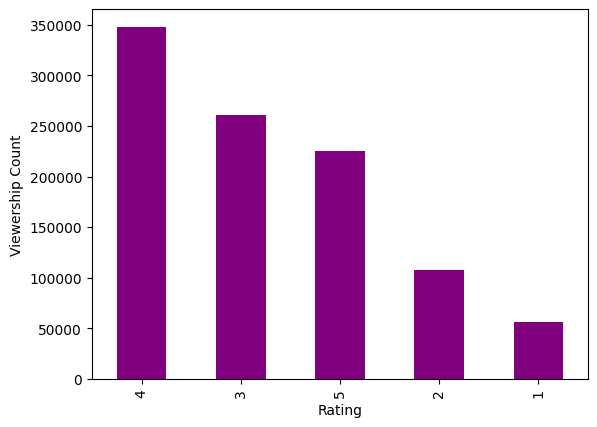

In [14]:
a = master_data.groupby("Rating").size().sort_values(ascending=False)[:25]
plt.xlabel("Rating")
plt.ylabel("Viewership Count")
a.plot(kind="bar",color = ['purple'])
plt.show()

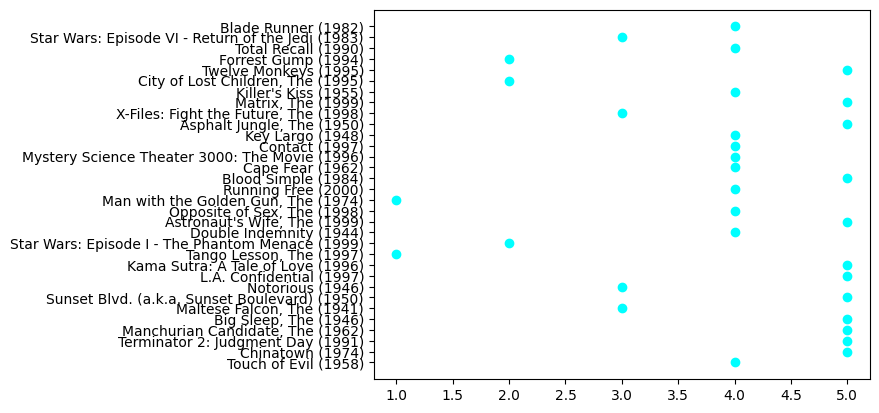

In [15]:
# Ratings for all the movies reviewed by a particular user whose user ID is 700

a = master_data[master_data.UserID == 700]

plt.scatter(y=a.Title, x=a.Rating , color = 'aqua')
plt.show()

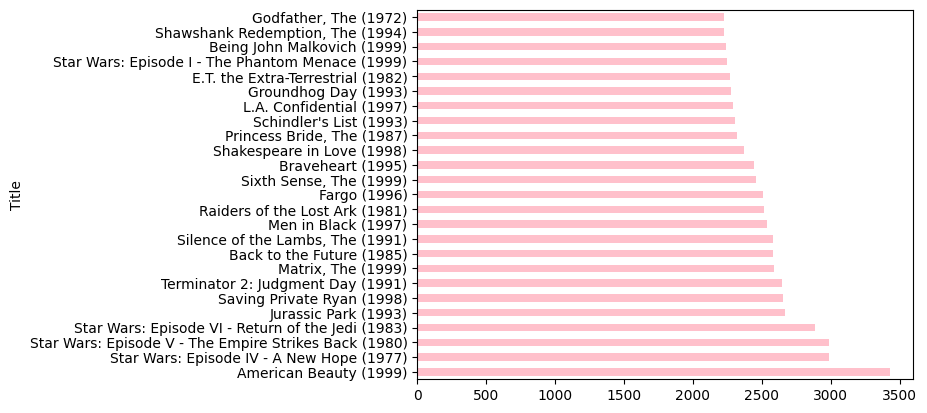

In [16]:
a = master_data.groupby("Title").size().sort_values(ascending=False)[:25]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
a.plot(kind="barh", color = ['pink'])
plt.show()

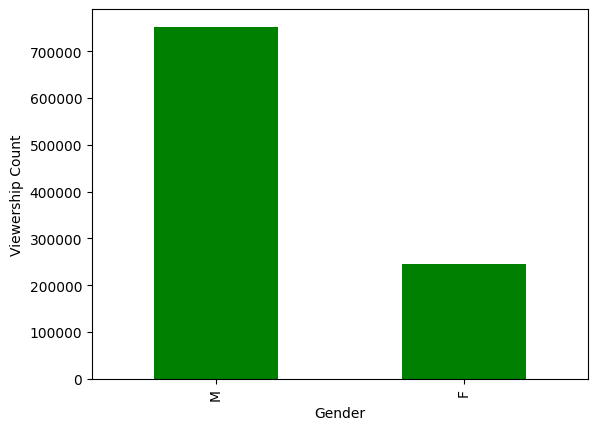

In [17]:
a = master_data.groupby("Gender").size().sort_values(ascending=False)[:25]
plt.xlabel("Gender")
plt.ylabel("Viewership Count")
a.plot(kind="bar", color = ['green'])
plt.show()

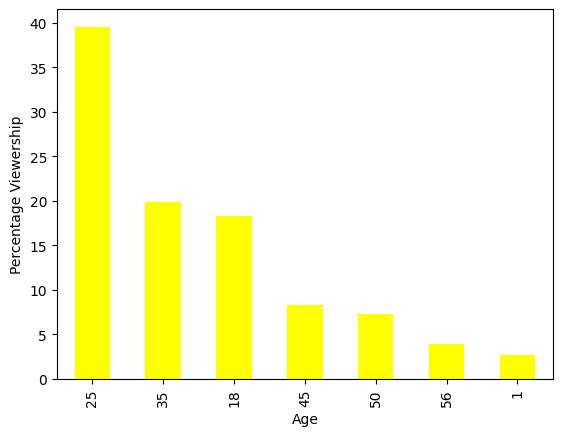

In [18]:
a = master_data.groupby("Age").size().sort_values(ascending=False)[:25]
plt.xlabel("Age")
plt.ylabel("Percentage Viewership")
total_viewership = len(master_data)
a_per = (a / total_viewership) * 100
a_per.plot(kind="bar",color = ['yellow'])
plt.show()

# **MACHINE LEARNING**

In [19]:
gender = {'F':1, 'M':2}
master_data['Gender'] = master_data['Gender'].replace(gender)

In [20]:
features = master_data[['MovieID', 'Age', 'Occupation', 'Gender', 'UserID']].values

labels = master_data[['Rating']].values

In [21]:
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

In [22]:
test_labels = test_labels.ravel()

# **DIFFERENT ML MODELS**

In [23]:
from sklearn.metrics import accuracy_score

# **LOGISTIC REGRESSION**

Logistic Regression is a binary classification algorithm used to predict the probability of an event occurring. It's widely used for problems where the dependent variable is categorical and has two possible outcomes. Logistic Regression models the relationship between the dependent variable and one or more independent variables by estimating probabilities using the logistic function.

In [24]:
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(train, train_labels)
Y_pred = model.predict(test)
accuracy = accuracy_score(test_labels, Y_pred)
accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.35018990973594805

# **K NEAREST NEIGHBOURS CLASSIFIER**

K-NN is a simple and intuitive classification algorithm. It classifies data points based on their similarity to the nearest neighbors in the feature space. The 'K' in K-NN represents the number of neighboring data points used for classification. It's a non-parametric algorithm, meaning it doesn't assume a specific functional form for the data.

In [25]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(train, train_labels)
Y_pred = model.predict(test)
accuracy = accuracy_score(test_labels, Y_pred)
accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.2921604167994972

# **GAUSSIAN NAIVE BAYES**

Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem. The Gaussian Naive Bayes variant assumes that the features follow a Gaussian distribution, making it suitable for continuous data. It's known for its simplicity and efficiency and is commonly used in text classification and spam filtering.

In [26]:
model = GaussianNB()
model.fit(train, train_labels)
Y_pred = model.predict(test)
accuracy = accuracy_score(test_labels, Y_pred)
accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.35018990973594805

# **DECISION TREES**

Decision Trees are a versatile algorithm used for both classification and regression tasks. They create a tree-like structure where each node represents a decision based on a feature, and each leaf node represents a class or a value. Decision Trees are interpretable and can handle both categorical and numerical data.

In [27]:
model = DecisionTreeClassifier()
model.fit(train, train_labels)
Y_pred = model.predict(test)
accuracy = accuracy_score(test_labels, Y_pred)
accuracy

0.31570861683168017

# **RANDOM FOREST CLASSIFIER**

Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting. It's a powerful model that provides robust results by aggregating the outputs of multiple individual decision trees.

In [28]:
model = RandomForestClassifier()
model.fit(train, train_labels)
Y_pred = model.predict(test)
accuracy = accuracy_score(test_labels, Y_pred)
accuracy

<ipython-input-28-a02ab701d095>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train, train_labels)


0.3452258422974979

# **GRADIENT BOOSTING**

Gradient Boosting is another ensemble technique used for classification and regression. It builds an ensemble of decision trees sequentially, with each new tree focusing on correcting the errors of the previous ones. This method is known for its high predictive accuracy and is widely used in machine learning competitions.

In [29]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(train, train_labels)
Y_pred = model.predict(test)
accuracy = accuracy_score(test_labels, Y_pred)
accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3693448341819308